In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import re
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [2]:
survived_train = df_train.Survived

In [3]:
data = pd.concat([df_train.drop(['Survived'], axis=1), df_test])

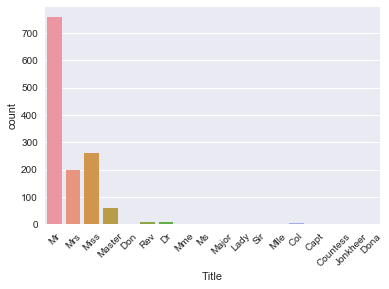

In [4]:
data['Title'] = data.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
sns.countplot(x='Title', data=data);
plt.xticks(rotation=45);

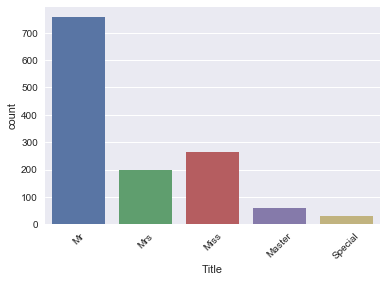

In [5]:
data['Title'] = data['Title'].replace({'Mlle':'Miss', 'Mme':'Mrs', 'Ms':'Miss'})
data['Title'] = data['Title'].replace(['Don', 'Dona', 'Rev', 'Dr',
                                            'Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess', 'Jonkheer'],'Special')
sns.countplot(x='Title', data=data);
plt.xticks(rotation=45);

In [6]:
#data.Sex = data.Sex.replace({'male': 0, 'female': 1});
#data.head()

In [7]:
data['Has_Cabin'] = ~data.Cabin.isnull()
#data.Has_Cabin = data.Has_Cabin.replace({True: 1, False: 0})
data.head()

PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked Title  \
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S    Mr   
1  female  38.0      1      0          PC 17599  71.2833   C85        C   Mrs   
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  Miss   
3  female  35.0      1      0            113803  53.1000  C123        S   Mrs   
4    male  35.0      0      0            373450   8.0500   NaN        S    Mr   

   Has_Cabin  
0      False  
1       True  
2      False  
3       True  
4      False

In [8]:
data = data.drop(['Cabin', 'Name', 'PassengerId', 'Ticket'], axis=1)
data.head()

Pclass     Sex   Age  SibSp  Parch     Fare Embarked Title  Has_Cabin
0       3    male  22.0      1      0   7.2500        S    Mr      False
1       1  female  38.0      1      0  71.2833        C   Mrs       True
2       3  female  26.0      0      0   7.9250        S  Miss      False
3       1  female  35.0      1      0  53.1000        S   Mrs       True
4       3    male  35.0      0      0   8.0500        S    Mr      False

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
Pclass       1309 non-null int64
Sex          1309 non-null object
Age          1046 non-null float64
SibSp        1309 non-null int64
Parch        1309 non-null int64
Fare         1308 non-null float64
Embarked     1307 non-null object
Title        1309 non-null object
Has_Cabin    1309 non-null bool
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 133.3+ KB


In [10]:
data.Age = data.Age.fillna(df_train.Age.median())
data.Fare = data.Fare.fillna(df_train.Fare.median())
data['Embarked'] = data['Embarked'].fillna('S')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
Pclass       1309 non-null int64
Sex          1309 non-null object
Age          1309 non-null float64
SibSp        1309 non-null int64
Parch        1309 non-null int64
Fare         1309 non-null float64
Embarked     1309 non-null object
Title        1309 non-null object
Has_Cabin    1309 non-null bool
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 133.3+ KB


In [11]:
data.head()

Pclass     Sex   Age  SibSp  Parch     Fare Embarked Title  Has_Cabin
0       3    male  22.0      1      0   7.2500        S    Mr      False
1       1  female  38.0      1      0  71.2833        C   Mrs       True
2       3  female  26.0      0      0   7.9250        S  Miss      False
3       1  female  35.0      1      0  53.1000        S   Mrs       True
4       3    male  35.0      0      0   8.0500        S    Mr      False

In [12]:
data['CatAge'] = pd.qcut(data['Age'], 4, labels=False)
data['CatFare']= pd.qcut(data['Fare'], 4, labels=False)
data.head()

Pclass     Sex   Age  SibSp  Parch     Fare Embarked Title  Has_Cabin  \
0       3    male  22.0      1      0   7.2500        S    Mr      False   
1       1  female  38.0      1      0  71.2833        C   Mrs       True   
2       3  female  26.0      0      0   7.9250        S  Miss      False   
3       1  female  35.0      1      0  53.1000        S   Mrs       True   
4       3    male  35.0      0      0   8.0500        S    Mr      False   

   CatAge  CatFare  
0       0        0  
1       3        3  
2       1        1  
3       2        3  
4       2        1

In [13]:
data = data.drop(['Age', 'Fare'], axis=1)
data.head()

Pclass     Sex  SibSp  Parch Embarked Title  Has_Cabin  CatAge  CatFare
0       3    male      1      0        S    Mr      False       0        0
1       1  female      1      0        C   Mrs       True       3        3
2       3  female      0      0        S  Miss      False       1        1
3       1  female      1      0        S   Mrs       True       2        3
4       3    male      0      0        S    Mr      False       2        1

In [14]:
data.Fam_Size = data.SibSp + data.Parch
data = data.drop(['SibSp','Parch'], axis=1)
data.head()

Pclass     Sex Embarked Title  Has_Cabin  CatAge  CatFare
0       3    male        S    Mr      False       0        0
1       1  female        C   Mrs       True       3        3
2       3  female        S  Miss      False       1        1
3       1  female        S   Mrs       True       2        3
4       3    male        S    Mr      False       2        1

In [15]:
data_dum = pd.get_dummies(data, drop_first=True)
data_dum.head()

Pclass  Has_Cabin  CatAge  CatFare  Sex_male  Embarked_Q  Embarked_S  \
0       3      False       0        0         1           0           1   
1       1       True       3        3         0           0           0   
2       3      False       1        1         0           0           1   
3       1       True       2        3         0           0           1   
4       3      False       2        1         1           0           1   

   Title_Miss  Title_Mr  Title_Mrs  Title_Special  
0           0         1          0              0  
1           0         0          1              0  
2           1         0          0              0  
3           0         0          1              0  
4           0         1          0              0

In [16]:
data_train = data_dum.iloc[:891]
data_test = data_dum.iloc[891:]

In [33]:
X = data_train.values
test = data_test.values
y = survived_train.values

In [34]:
# Import necessary modules
import numpy as np
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
dep = np.arange(1, 9)
param_grid = {'max_depth': dep}

# Instantiate a logistic regression classifier: logreg
clf = tree.DecisionTreeClassifier()

# Instantiate the GridSearchCV object: logreg_cv
clf_cv = GridSearchCV(clf, param_grid, cv=5)

# Fit it to the data
clf_cv.fit(X, y)

# Print the tuned parameter and score
print("Tuned Decision Tree Parameters: {}".format(clf_cv.best_params_))
print("Best score is {}".format(clf_cv.best_score_))


Tuned Decision Tree Parameters: {'max_depth': 3}
Best score is 0.8103254769921436


In [35]:
Y_pred = clf_cv.predict(test)
df_test['Survived'] = Y_pred

In [20]:
df_test[['PassengerId', 'Survived']].to_csv('sub_cv_dt_pp_take_2.csv', index=False)

_Accuracy_ was 78.9; an improvement, but by how much?

## GridSearch w/ SVC

In [36]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)
test_scaled = preprocessing.scale(test)

/Users/hugobowne/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


In [37]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
svc_cv = GridSearchCV(svc, parameters)
svc_cv.fit(X_scaled, y)

# Print the tuned parameter and score
print("Tuned Decision SVM Parameters: {}".format(svc_cv.best_params_))
print("Best score is {}".format(svc_cv.best_score_))

Tuned Decision SVM Parameters: {'C': 1, 'kernel': 'rbf'}
Best score is 0.813692480359147


In [38]:
Y_pred = svc_cv.predict(test_scaled)
df_test['Survived'] = Y_pred

In [39]:
df_test[['PassengerId', 'Survived']].to_csv('sub_cv_svc_pp_sc.csv', index=False)

In [28]:
data_dum.describe()

Pclass       CatAge      CatFare     Sex_male   Embarked_Q  \
count  1309.000000  1309.000000  1309.000000  1309.000000  1309.000000   
mean      2.294882     1.381207     1.486631     0.644003     0.093965   
std       0.837836     1.112474     1.122135     0.478997     0.291891   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000     0.000000     0.000000     0.000000     0.000000   
50%       3.000000     1.000000     1.000000     1.000000     0.000000   
75%       3.000000     2.000000     2.000000     1.000000     0.000000   
max       3.000000     3.000000     3.000000     1.000000     1.000000   

        Embarked_S   Title_Miss     Title_Mr    Title_Mrs  Title_Special  
count  1309.000000  1309.000000  1309.000000  1309.000000    1309.000000  
mean      0.699771     0.201681     0.578304     0.151261       0.022154  
std       0.458533     0.401408     0.494019     0.358440       0.147242  
min       0.000000     0.000000     0.000000     0.000000       0.000000  
25%       0.000000     0.000000     0.000000     0.000000       0.000000  
50%       1.000000     0.000000     1.000000     0.000000       0.000000  
75%       1.000000     0.000000     1.000000     0.000000       0.000000  
max       1.000000     1.000000     1.000000     1.000000       1.000000